# Langkah 1: Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Langkah 2: Load dataset Excel

In [2]:
data = pd.read_excel('D:\\kuliah\\Kecerdasan Bisnis\\UAS\\DataBank.xlsx')

# Cetak beberapa baris pertama untuk memeriksa data

In [3]:
print(data.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


# Langkah 4: Visualisasi Data
### Gunakan visualisasi seperti histogram, box plot, atau scatter plot

### Contoh: Histogram untuk kolom 'Income'

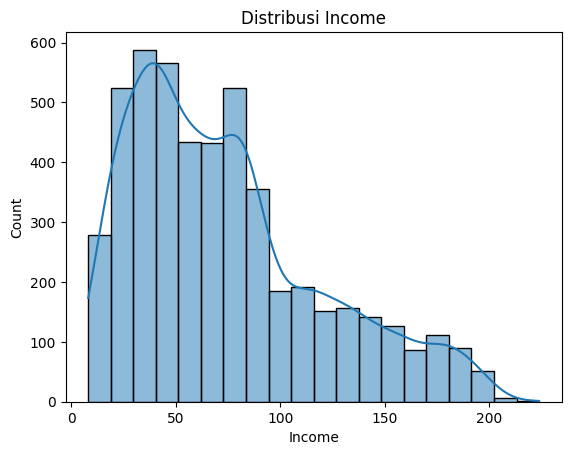

In [4]:
sns.histplot(data['Income'], bins=20, kde=True)
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.show()

# Langkah 5: Feature Scaling
### Skalakan fitur menggunakan StandardScaler

In [5]:
X = data.drop('Personal Loan', axis=1)  # X adalah semua fitur kecuali 'Personal Loan'
y = data['Personal Loan']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Langkah 6: Pemilihan Fitur

## Menggunakan semua fitur kecuali 'Personal Loan'

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Langkah 7: Penerapan Model KNN

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)  # Gantilah nilai K sesuai kebutuhan
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Langkah 8: Evaluasi Model

In [8]:
y_pred = knn.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
matriks_kesalahan = confusion_matrix(y_test, y_pred)
laporan_klasifikasi = classification_report(y_test, y_pred)

# Langkah 9: Insight dan Rekomendasi
### Analisis hasil prediksi, temukan pola, identifikasi faktor-faktor, dan rekomendasi

### Cetak hasil evaluasi

In [9]:
print("Akurasi:", akurasi)

Akurasi: 0.949


### Cetak laporan klasifikasi

In [10]:
print("Laporan Klasifikasi:\n", laporan_klasifikasi)

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       895
           1       0.91      0.57      0.70       105

    accuracy                           0.95      1000
   macro avg       0.93      0.78      0.84      1000
weighted avg       0.95      0.95      0.94      1000



### Insight dan Rekomendasi
### Analisis pola kesalahan umum

In [11]:
positif_salah = matriks_kesalahan[0, 1]  # Kesalahan prediksi Personal Loan (aktual: 0, prediksi: 1)
negatif_salah = matriks_kesalahan[1, 0]  # Kesalahan prediksi Non-Personal Loan (aktual: 1, prediksi: 0)

print("Positif Salah (Diprediksi Personal Loan, Aktual Non-Personal Loan):", positif_salah)
print("Negatif Salah (Diprediksi Non-Personal Loan, Aktual Personal Loan):", negatif_salah)


Positif Salah (Diprediksi Personal Loan, Aktual Non-Personal Loan): 6
Negatif Salah (Diprediksi Non-Personal Loan, Aktual Personal Loan): 45


### Analisis distribusi fitur 'Income'

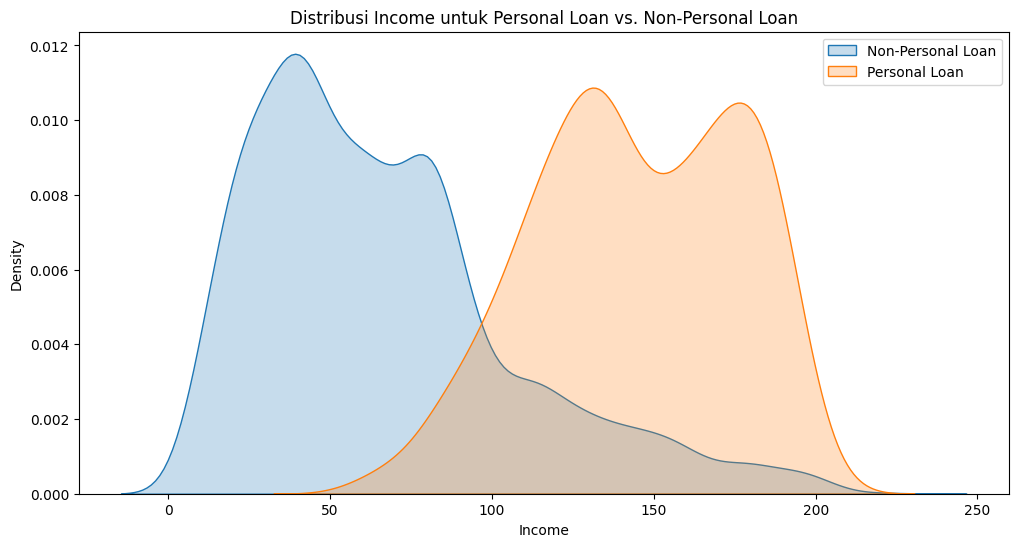

In [12]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['Personal Loan'] == 0]['Income'], label='Non-Personal Loan', fill=True)
sns.kdeplot(data[data['Personal Loan'] == 1]['Income'], label='Personal Loan', fill=True)
plt.title('Distribusi Income untuk Personal Loan vs. Non-Personal Loan')
plt.xlabel('Income')
plt.legend()
plt.show()

# Menampilkan jumlah data pada masing-masing kategori

In [13]:
jumlah_personal_loan = data['Personal Loan'].value_counts()
print("\nJumlah Data pada Masing-masing Kategori:")
print(jumlah_personal_loan)


Jumlah Data pada Masing-masing Kategori:
Personal Loan
0    4520
1     480
Name: count, dtype: int64


# Menampilkan total data yang terbanyak dari Personal Loan

In [14]:
total_data_dominan = data['Personal Loan'].value_counts().max()
print("Total Data yang Terbanyak:", total_data_dominan)

Total Data yang Terbanyak: 4520


# Saran kepada atasan

In [15]:
print("\nSaran untuk Atasan:")
print("- Periksa dengan cermat distribusi fitur 'Income' pada setiap kelas.")
print("- Analisis matriks kesalahan untuk memahami pola kesalahan model.")
print("- Tinjau laporan klasifikasi untuk melihat metrik evaluasi model.")
print(f"- Jumlah kategori Personal Loan:\n{jumlah_personal_loan}")


Saran untuk Atasan:
- Periksa dengan cermat distribusi fitur 'Income' pada setiap kelas.
- Analisis matriks kesalahan untuk memahami pola kesalahan model.
- Tinjau laporan klasifikasi untuk melihat metrik evaluasi model.
- Jumlah kategori Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64
